In [189]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import decomposition
from sklearn.cluster import KMeans
import random

%matplotlib inline

# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv', low_memory=False, header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

# split the data and labels in training and testing segments
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [190]:
# 3-fold cross validated hyperparameter fine tuning with gridsearchcv

# # Hyperparameter optimization for LinearSVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# max_iter_range = [100, 500, 1000]
# parameters = {"C":C_range, "max_iter":max_iter_range}
# clf = GridSearchCV(lsvc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for SVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# parameters = {"C":C_range}
# clf = GridSearchCV(svc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for KNN using Grid Search Cross-Validation
# parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'leaf_size': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(knn, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Decision Tree using Grid Search Cross-Validation
# parameters = [{'max_features': ['auto', 'log2'], 'max_depth': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(dt, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Random Forest using Grid Search Cross-Validation
# parameters = [{"n_estimators": [5, 10, 20, 50]}]
# clf = GridSearchCV(rf, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

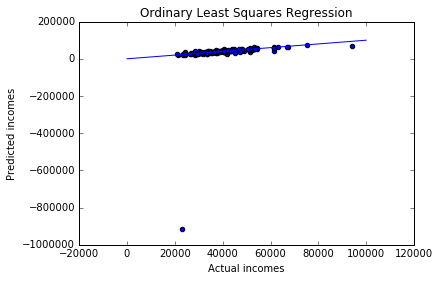

RMSE: 1    75774.647962
dtype: float64
r2: -50.4913558873


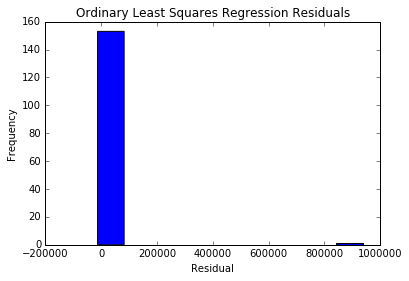

                                                           1
Kaplan University-Hagerstown Campus            -12671.094030
University of Hawaii at Manoa                  -11252.867547
Sarah Lawrence College                         -11109.434046
Universidad Politecnica de Puerto Rico         -10080.871451
National University                             -8343.809764
CUNY City College                               -8200.299612
Swedish Institute a College of Health Sciences  -8128.466830
California College of the Arts                  -6524.583335
The College of Idaho                            -6377.389010
Eastern University                              -6175.077890
                                                          1
Rabbinical College of Ch'san Sofer New York   938197.924356
Midwestern University-Glendale                 24708.466566
University of Phoenix-Online Campus            20368.580806
Amridge University                             15190.502789
Alaska Pacific University    

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


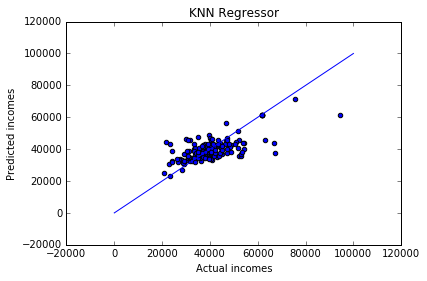

RMSE: 1    7744.350266
dtype: float64
r2: 0.462155851913


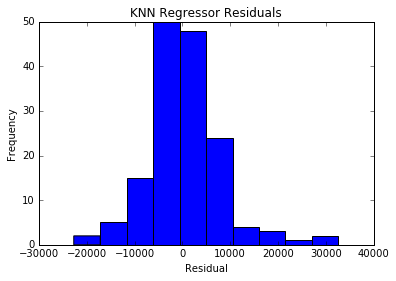

                                           1
College of the Atlantic               -22720
Marlboro College-Graduate School      -20120
Sarah Lawrence College                -16380
The New England Conservatory of Music -14760
Warren Wilson College                 -14620
Hendrix College                       -14040
California College of the Arts        -12820
Center for Advanced Legal Studies     -10200
University of Connecticut              -9540
Rollins College                        -9060
                                           1
Midwestern University-Glendale         32600
Upstate Medical University             29400
United States Merchant Marine Academy  23060
Kettering University                   17640
National University                    17500
Bryan College of Health Sciences       16520
Bellevue University                    15880
LeTourneau University                  15140
Molloy College                         13920
Argosy University-Sarasota             10740


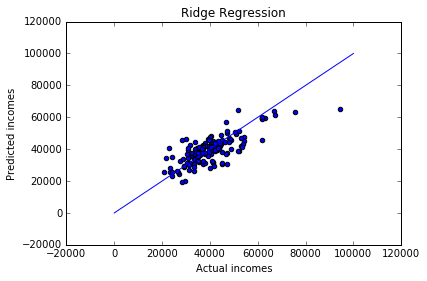

RMSE: 1    6777.24902
dtype: float64
r2: 0.588098512761


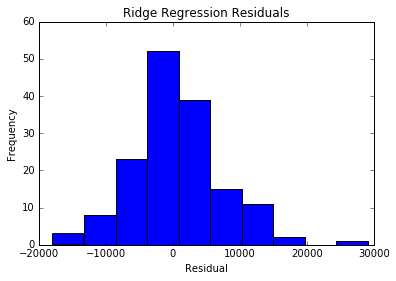

                                                        1
Rabbinical College of Ch'san Sofer New York -17974.264933
Kaplan University-Hagerstown Campus         -17040.780695
Sarah Lawrence College                      -16380.336693
Argosy University-Sarasota                  -13041.874594
College of the Atlantic                     -12753.852900
North Carolina A & T State University       -11149.767495
Hendrix College                             -10786.502753
Warren Wilson College                       -10662.824432
University of Connecticut                   -10394.646628
The New England Conservatory of Music        -9659.459653
                                                         1
Midwestern University-Glendale                29070.588789
Stratford University                          16534.194813
University of Phoenix-Online Campus           15618.672956
American InterContinental University-Atlanta  14280.559129
Amridge University                            13796.887159
Bryan Co

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


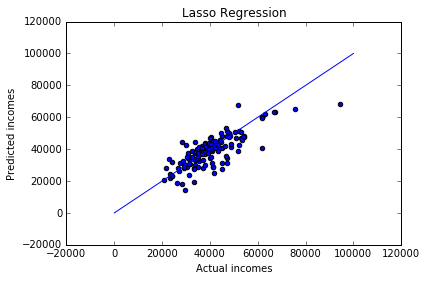

RMSE: 1    6486.634357
dtype: float64
r2: 0.622666547578


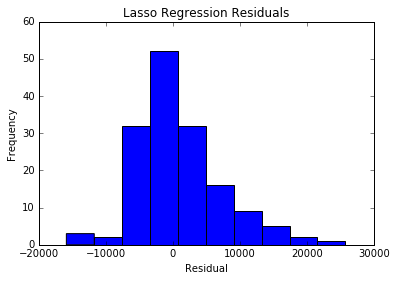

                                                        1
Argosy University-Sarasota                  -15907.369307
Kaplan University-Hagerstown Campus         -15804.200676
Sarah Lawrence College                      -12354.424368
Rabbinical College of Ch'san Sofer New York -11101.029821
North Carolina A & T State University       -11072.776695
Warren Wilson College                        -7573.478033
Hobart William Smith Colleges                -6780.278999
The New England Conservatory of Music        -6762.153935
College of the Atlantic                      -6694.105722
Bryn Mawr College                            -6665.845111
                                                          1
Midwestern University-Glendale                 25755.602472
University of Phoenix-Online Campus            20726.182182
Amridge University                             17831.445448
Alaska Pacific University                      16331.139036
Stratford University                           16122.904322
La

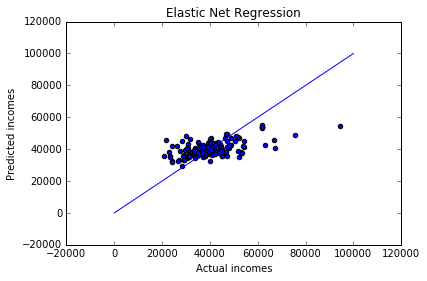

RMSE: 1    8628.519713
dtype: float64
r2: 0.332334301951


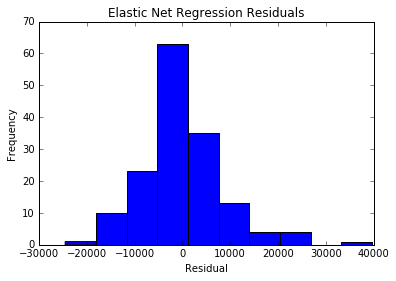

                                                        1
College of the Atlantic                     -24519.276919
Sarah Lawrence College                      -17959.236386
Warren Wilson College                       -17820.403232
Kaplan University-Hagerstown Campus         -16786.497290
San Francisco Art Institute                 -15455.741062
Rabbinical College of Ch'san Sofer New York -15280.821701
Caribbean University-Vega Baja              -15158.132033
Hendrix College                             -14639.021261
The New England Conservatory of Music       -12448.273567
Marlboro College-Graduate School            -12343.428290
                                                  1
Midwestern University-Glendale         39614.320438
Medical University of South Carolina   26678.925914
Upstate Medical University             26333.367371
United States Merchant Marine Academy  20970.950275
Kettering University                   20535.253174
Bryan College of Health Sciences       16989.57363

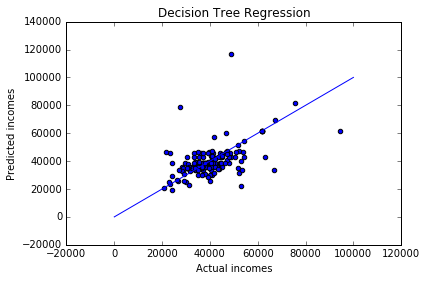

RMSE: 1    10727.098953
dtype: float64
r2: -0.0319319211706


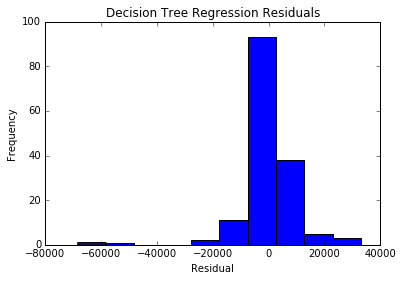

                                                       1
Alliant International University           -68400.000000
Everest University-South Orlando           -51600.000000
College of the Atlantic                    -24925.000000
Marlboro College-Graduate School           -22662.500000
California State University-San Bernardino -15400.000000
University of Arkansas at Pine Bluff       -14552.763819
University of Connecticut                  -13450.000000
Center for Advanced Legal Studies          -12562.500000
Davenport University                       -12170.588235
California College of the Arts             -11378.260870
                                                  1
United States Merchant Marine Academy  33200.000000
Midwestern University-Glendale         32600.000000
National University                    30700.000000
Bryan College of Health Sciences       20755.000000
Kettering University                   20429.411765
LeTourneau University                  20191.139241
Argosy Un

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


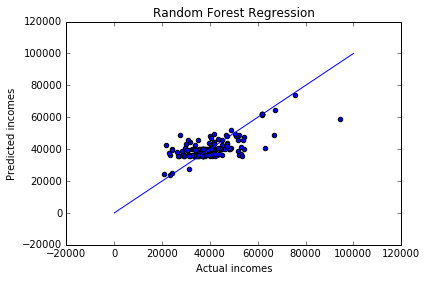

RMSE: 1    7561.024775
dtype: float64
r2: 0.487318323971


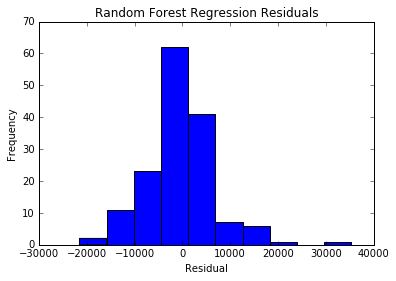

                                                        1
Everest University-South Orlando            -21529.486341
College of the Atlantic                     -20800.778709
University of Arkansas at Pine Bluff        -15518.191718
Warren Wilson College                       -15394.544465
Rabbinical College of Ch'san Sofer New York -14703.205817
The New England Conservatory of Music       -14670.993323
Marlboro College-Graduate School            -13193.857786
Sarah Lawrence College                      -12831.860516
Hendrix College                             -12587.307658
San Francisco Art Institute                 -11731.828631
                                                  1
Midwestern University-Glendale         35341.389464
Kettering University                   22186.574772
LeTourneau University                  17969.164281
United States Merchant Marine Academy  17672.901642
Bryan College of Health Sciences       16246.652923
Bellevue University                    16223.67341

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [191]:
def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def rmse(y_test, y_predict):    
    a = y_test - y_predict
    a = a ** 2
    a = a.mean()
    a = np.sqrt(a)
    return a 

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_test-y_predict)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def listTenLargestResiduals(y_predict, y_test):
    residuals = y_test-y_predict
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    y_predict = np.reshape(y_predict, (len(y_predict),1))    
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)
        
regress(linear_model.LinearRegression(), 'Ordinary Least Squares Regression')
regress(KNeighborsRegressor(), "KNN Regressor")
regress(linear_model.Ridge(), 'Ridge Regression')
regress(linear_model.Lasso(), 'Lasso Regression')
regress(linear_model.ElasticNet(), 'Elastic Net Regression')
regress(DecisionTreeRegressor(max_depth=10), 'Decision Tree Regression')
regress(RandomForestRegressor(n_estimators = 100, max_depth = 5, warm_start = False), 'Random Forest Regression')

In [193]:
# feature importance 

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
coef = pd.DataFrame(reg.coef_.T, index=x.columns.values)
coef = coef.sort(0,axis=0, ascending=False)
coef

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0
PCIP29,1.419231e+10
PCIP41,1.399604e+10
PCIP46,1.367985e+10
PCIP01,1.357503e+10
PCIP16,1.355919e+10
PCIP49,1.355888e+10
PCIP45,1.353840e+10
PCIP51,1.352038e+10
PCIP47,1.351261e+10
PCIP04,1.350911e+10


In [194]:
from sklearn.feature_selection import SelectFromModel
print(x.shape)
reg = linear_model.LinearRegression().fit(x, y)
x_new = SelectFromModel(reg, prefit=True).transform(x)
print(x_new.shape)

(1534, 230)
(1534, 21)


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


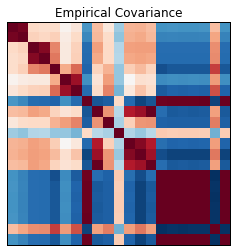

In [195]:
# plotting covariance matrix after feature selection
# http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
x_new = SelectKBest(f_regression, k=21).fit_transform(x, y)
x_norm = []
x_norm[:] = x_new[:]
x_norm = np.asarray(x_norm)
x_norm -= x_norm.mean(axis=0)
x_norm /= x_norm.std(axis=0)

emp_cov = np.dot(x_norm.T, x_norm) / len(x_norm)
vmax = emp_cov.max()
vmin = emp_cov.min()
plt.imshow(emp_cov, interpolation='nearest', vmin=vmin, vmax=vmax,
           cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.title('Empirical Covariance')
plt.show()

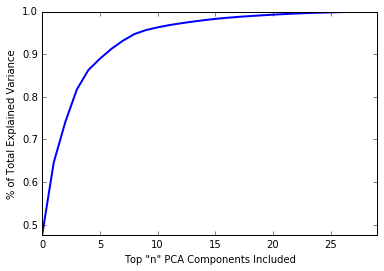

In [196]:
# PCA, number of features vs feature importance
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#example-plot-digits-pipe-py
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)

var_explained_cuml = []
var_explained_cuml.append(pca.explained_variance_ratio_[0])

for i in range(1, 30):
    var_explained_cuml.append(var_explained_cuml[i-1]+pca.explained_variance_ratio_[i])
plt.plot(var_explained_cuml, linewidth=2)
plt.axis('tight')
plt.xlabel('Top "n" PCA Components Included')
plt.ylabel('% of Total Explained Variance')

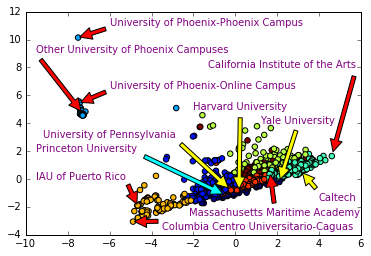

In [267]:
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca_reduced = pca.fit_transform(x)
x_pca_reduced_pd = pd.DataFrame(data=x_pca_reduced, index=list_schools, columns=['e1', 'e2'])  # 1st row as the column names

clusters = KMeans().fit_predict(x) #n_clusters=5
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_pca_reduced_pd.ix[:, 0], x_pca_reduced_pd.ix[:, 1], c=clusters, s=30)

# Harvard University
ax.annotate(x_pca_reduced_pd.index.values[516], xy=(x_pca_reduced_pd.ix[516,'e1'],x_pca_reduced_pd.ix[516,'e2']), 
            xytext=(-2,5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Phoenix - Phoenix Campus
ax.annotate(x_pca_reduced_pd.index.values[31], xy=(x_pca_reduced_pd.ix[31,'e1'], x_pca_reduced_pd.ix[31,'e2']), 
            xytext=(-6,11), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Princeton University
ax.annotate(x_pca_reduced_pd.index.values[726], xy=(x_pca_reduced_pd.ix[726,'e1'], x_pca_reduced_pd.ix[726,'e2']), 
            xytext=(-9.5,2), color='purple', arrowprops=dict(facecolor='cyan', shrink=0.05))

# Massachusetts Maritime Academy
ax.annotate(x_pca_reduced_pd.index.values[525], xy=(x_pca_reduced_pd.ix[525,'e1'], x_pca_reduced_pd.ix[525,'e2']), 
            xytext=(-2.2,-2.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# California Institute of the Arts
ax.annotate(x_pca_reduced_pd.index.values[82], xy=(x_pca_reduced_pd.ix[82,'e1'], x_pca_reduced_pd.ix[82,'e2']), 
            xytext=(-1.3,8), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# University of Phoenix - Online Campus
ax.annotate(x_pca_reduced_pd.index.values[1434], xy=(x_pca_reduced_pd.ix[1434,'e1'], x_pca_reduced_pd.ix[1434,'e2']), 
            xytext=(-6,6.5), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Other University of Phoenix Campuses
ax.annotate('Other University of Phoenix Campuses', xy=(x_pca_reduced_pd.ix[1499,'e1'], x_pca_reduced_pd.ix[1499,'e2']), 
            xytext=(-9.5,9.1), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Yale University
ax.annotate(x_pca_reduced_pd.index.values[180], xy=(x_pca_reduced_pd.ix[180,'e1'], x_pca_reduced_pd.ix[180,'e2']), 
            xytext=(1.2,4), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Pennsylvania
ax.annotate(x_pca_reduced_pd.index.values[1076], xy=(x_pca_reduced_pd.ix[1076,'e1'], x_pca_reduced_pd.ix[1076,'e2']), 
            xytext=(-9.2,3), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Columbia Centro Universitario-Caguas
ax.annotate(x_pca_reduced_pd.index.values[1379], xy=(x_pca_reduced_pd.ix[1379,'e1'], x_pca_reduced_pd.ix[1379,'e2']), 
            xytext=(-3.5,-3.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Caltech
ax.annotate('Caltech', xy=(x_pca_reduced_pd.ix[56,'e1'], x_pca_reduced_pd.ix[56,'e2']), 
            xytext=(4,-1.5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Inter American University of Puerto Rico
ax.annotate('IAU of Puerto Rico', xy=(x_pca_reduced_pd.ix[1391,'e1'], x_pca_reduced_pd.ix[1391,'e2']), 
            xytext=(-9.5,0), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [261]:
# add the violin plots of each cluster across different features to come to conclusions...
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html